# d1=3

In [34]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import matplotlib.ticker as ptick

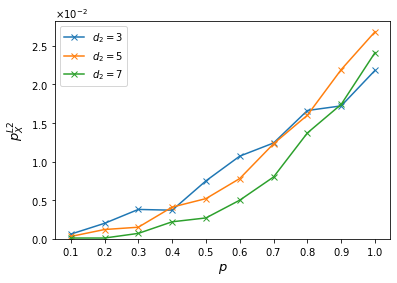

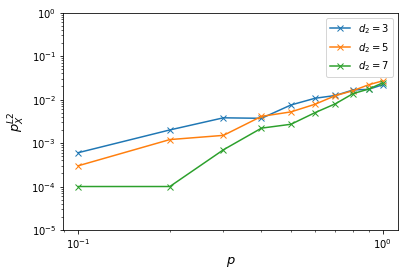

In [17]:
# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/SWAP/d1=3,N=1,eta=1000"
# ファイル名
file2 = "X error,N=1,d2=(3,7,2),eta=1000,trials=10000,ver1" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data2 = pd.read_csv(file2, index_col=0)
# データフレームの行名(リスト)を取得
code_distance_list = data2.index
# データフレームの列名(リスト)を取得
p_list = data2.columns
##### グラフ作成 #####

a = np.array(p_list)
a = [float(num) for num in a]
a = np.array(a)

fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_X^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.legend()

fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_X^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.00001, 1)
ax.legend()

In [18]:
from sklearn import linear_model
clf = linear_model.LinearRegression()

for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    # 説明変数
    X = np.log10(a).reshape(-1, 1)
    #X = np.log10([a])
    #print(X)
    # 目的変数
    Y = np.log10(b)
    #print(Y)
    # 予測モデルを作成
    clf.fit(X, Y)
    # 回帰係数
    print(clf.coef_)
    # 切片 (誤差)
    print(clf.intercept_)
    # 決定係数
    #print(clf.score(X, Y))
    print(clf.predict([[-4]]))
    print(10**clf.predict([[-4]]),"\n")

[1.54038919]
-1.6681569847624647
[-7.82971374]
[1.48008365e-08] 

[1.95692673]
-1.6251828770212713
[-9.45288978]
[3.52460311e-10] 

[2.65457112]
-1.6887414950394901
[-12.30702599]
[4.93144287e-13] 



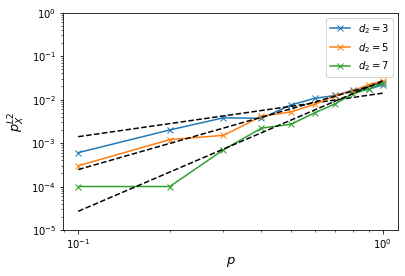

In [19]:
fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    mean = np.mean(np.log10(b)-(i+1)*np.log10(a))
    ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]))
    ax.plot(a, 10**mean*a**(i+1),marker='',color='k',linestyle="dashed")
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_X^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.00001, 1)
ax.legend()
plt.show()

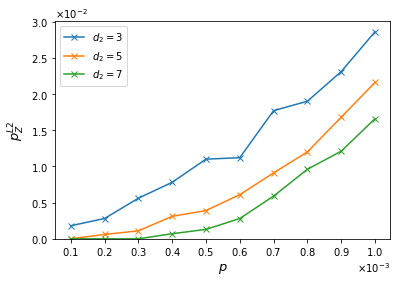

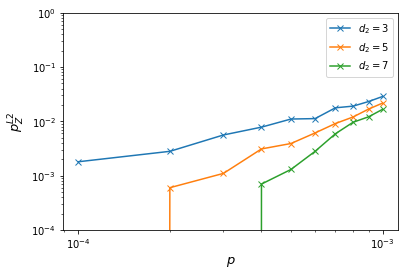

In [20]:
# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/SWAP/d1=3,N=1,eta=1000"
# ファイル名
file2 = "Z error,N=1,d2=(3,7,2),eta=1000,trials=10000,ver0" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data2 = pd.read_csv(file2, index_col=0)
# データフレームの行名(リスト)を取得
code_distance_list = data2.index
# データフレームの列名(リスト)を取得
p_list = data2.columns
##### グラフ作成 #####

a = np.array(p_list)
a = [float(num) for num in a]
a = np.array(a)

fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_Z^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.legend()


fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_Z^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.0001, 1)
ax.legend()

/var/folders/z2/d7v_26mx7_s1sc2tvt5zxxmc0000gn/T/ipykernel_13207/2762372890.py:21: RuntimeWarning: divide by zero encountered in log10
  mean = np.mean(np.log10(b)-(i+1)*np.log10(a))


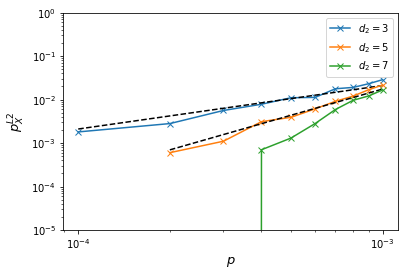

In [21]:
fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    if i == 0:
        b = np.array(data2.loc[code_distance_list[i]])
        mean = np.mean(np.log10(b)-(i+1)*np.log10(a))
        ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]))
        ax.plot(a, 10**mean*a**(i+1),marker='',color='k',linestyle="dashed")
    if i == 1:
        b = np.array(data2.loc[code_distance_list[i]])[1:]
        a = np.array(p_list)
        a = [float(num) for num in a]
        a = np.array(a)[1:]
        mean = np.mean(np.log10(b)-(i+1)*np.log10(a))
        ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]))
        ax.plot(a, 10**mean*a**(i+1),marker='',color='k',linestyle="dashed")
    if i == 2:
        b = np.array(data2.loc[code_distance_list[i]])[2:]
        a = np.array(p_list)
        a = [float(num) for num in a]
        a = np.array(a)[2:]
        mean = np.mean(np.log10(b)-(i+1)*np.log10(a))
        ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]))
        ax.plot(a, 10**mean*a**(i+1),marker='',color='k',linestyle="dashed")
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_X^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.00001, 1)
ax.legend()
plt.show()

In [24]:
for i in range(len(code_distance_list)):
    if i == 0:
        b = np.array(data2.loc[code_distance_list[i]])
        a = np.array(p_list)
        a = [float(num) for num in a]
        a = np.array(a)
        X = np.log10(a).reshape(-1, 1)
        Y = np.log10(b)
        clf.fit(X, Y)
        print(10**clf.predict([[-4]]),"\n")
        print(code_distance_list[i]*(4*3+6)/10**clf.predict([[-4]]),"\n")
    if i == 1:
        b = np.array(data2.loc[code_distance_list[i]])[1:]
        a = np.array(p_list)
        a = [float(num) for num in a]
        a = np.array(a)[1:]
        X = np.log10(a).reshape(-1, 1)
        Y = np.log10(b)
        clf.fit(X, Y)
        print(10**clf.predict([[-4]]),"\n")
        print(code_distance_list[i]*(4*3+6)/10**clf.predict([[-4]]),"\n")
    if i == 2:
        b = np.array(data2.loc[code_distance_list[i]])[3:]
        a = np.array(p_list)
        a = [float(num) for num in a]
        a = np.array(a)[3:]
        X = np.log10(a).reshape(-1, 1)
        Y = np.log10(b)
        clf.fit(X, Y)
        print(10**clf.predict([[-4]]),"\n")
        print(code_distance_list[i]*(4*3+6)/10**clf.predict([[-4]]),"\n")

[0.00147632] 

[36577.38773892] 

[0.00011255] 

[799658.84655119] 

[4.40983784e-06] 

[28572479.22387888] 



# d1 = 5

In [23]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import matplotlib.ticker as ptick

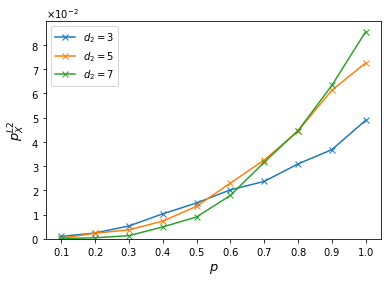

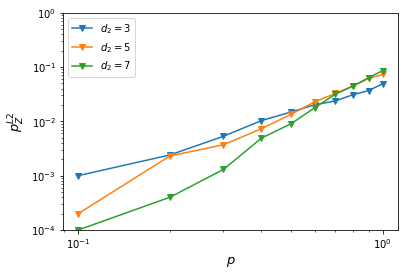

In [12]:
# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/SWAP/d1=5,N=1,eta=1000"
# ファイル名
file2 = "X error,N=1,d2=(3,7,2),eta=1000,trials=10000,ver1" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data2 = pd.read_csv(file2, index_col=0)
# データフレームの行名(リスト)を取得
code_distance_list = data2.index
# データフレームの列名(リスト)を取得
p_list = data2.columns
##### グラフ作成 #####

a = np.array(p_list)
a = [float(num) for num in a]
a = np.array(a)

fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_X^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.legend()

fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='v',label=r"$d_{2}=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_Z^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.0001, 1)
ax.legend()

In [13]:
from sklearn import linear_model
clf = linear_model.LinearRegression()

for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    # 説明変数
    X = np.log10(a).reshape(-1, 1)
    #X = np.log10([a])
    #print(X)
    # 目的変数
    Y = np.log10(b)
    #print(Y)
    # 予測モデルを作成
    clf.fit(X, Y)
    # 回帰係数
    print(clf.coef_)
    # 切片 (誤差)
    print(clf.intercept_)
    # 決定係数
    #print(clf.score(X, Y))
    print(clf.predict([[-4]]))
    print(10**clf.predict([[-4]]),"\n")

[1.71807881]
-1.337660082685069
[-8.20997534]
[6.16630015e-09] 

[2.48147178]
-1.1071393544634187
[-11.03302646]
[9.26773357e-12] 

[3.09925427]
-1.0842144150148905
[-13.48123151]
[3.3019348e-14] 



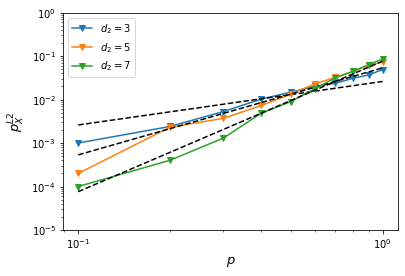

In [98]:
fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    mean = np.mean(np.log10(b)-(i+1)*np.log10(a))
    ax.plot(a, b,marker='v',label=r"$d_{2}=$"+str(code_distance_list[i]))
    ax.plot(a, 10**mean*a**(i+1),marker='',color='k',linestyle="dashed")
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_X^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.00001, 1)
ax.legend()
plt.show()

41489.36170212766
722222.2222222221
4550000.0


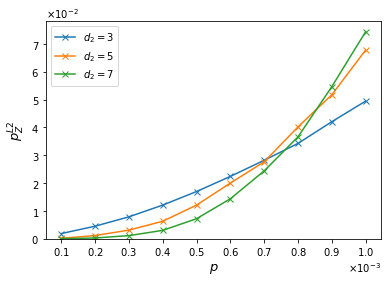

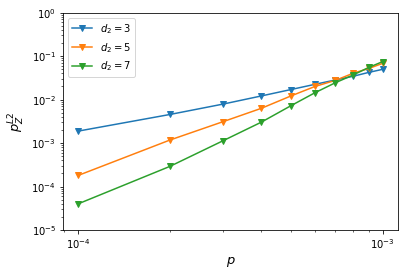

In [25]:
# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/SWAP/d1=5,N=1,eta=1000"
# ファイル名
file2 = "Z error,N=1,d2=(3,7,2),eta=1000,trials=100000,ver0" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data2 = pd.read_csv(file2, index_col=0)

# データフレームの行名(リスト)を取得
code_distance_list = data2.index

# データフレームの列名(リスト)を取得
p_list = data2.columns

##### グラフ作成 #####

a = np.array(p_list)
a = [float(num) for num in a]
a = np.array(a)

fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_Z^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.legend()


fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='v',label=r"$d_{2}=$"+str(code_distance_list[i]))
    print(code_distance_list[i]*(4*5+6)/b[0])
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_Z^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.00001, 1)
ax.legend()

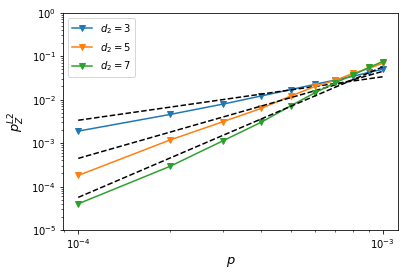

In [94]:
fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    mean = np.mean(np.log10(b)-(i+1)*np.log10(a))
    ax.plot(a, b,marker='v',label=r"$d_{2}=$"+str(code_distance_list[i]))
    ax.plot(a, 10**mean*a**(i+1),marker='',color='k',linestyle="dashed")
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_Z^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.00001, 1)
ax.legend()
plt.show()

# d1 = 7

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import matplotlib.ticker as ptick

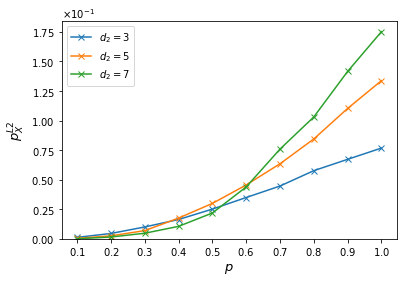

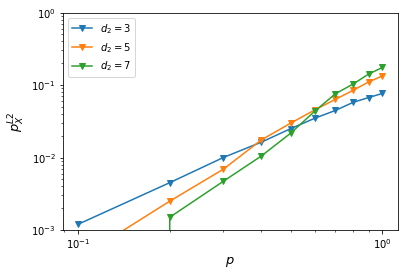

In [119]:
# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/SWAP/d1=7,N=1,eta=1000"
# ファイル名
file2 = "X error,N=1,d2=(3,7,2),eta=1000,trials=10000,ver1" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data2 = pd.read_csv(file2, index_col=0)

# データフレームの行名(リスト)を取得
code_distance_list = data2.index

# データフレームの列名(リスト)を取得
p_list = data2.columns

##### グラフ作成 #####

a = np.array(p_list)
a = [float(num) for num in a]
a = np.array(a)

fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_X^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.legend()

fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='v',label=r"$d_{2}=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_X^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.001, 1)
ax.legend()

In [3]:
from sklearn import linear_model
clf = linear_model.LinearRegression()

for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    # 説明変数
    X = np.log10(a).reshape(-1, 1)
    #X = np.log10([a])
    #print(X)
    # 目的変数
    Y = np.log10(b)
    #print(Y)
    # 予測モデルを作成
    clf.fit(X, Y)
    # 回帰係数
    print(clf.coef_)
    # 切片 (誤差)
    print(clf.intercept_)
    # 決定係数
    #print(clf.score(X, Y))
    print(clf.predict([[-4]]))
    print(10**clf.predict([[-4]]),"\n")

NameError: name 'code_distance_list' is not defined

38345.86466165558
404761.90476190473
3966666.6666666665


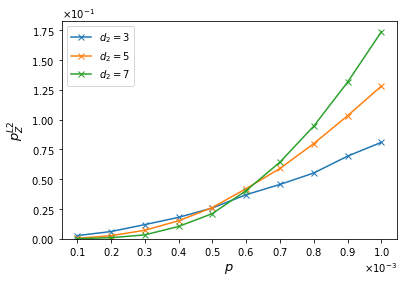

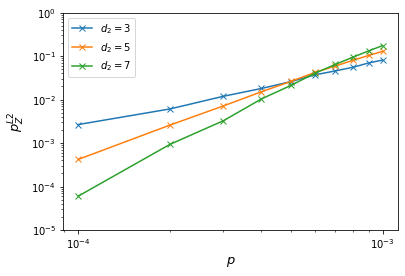

In [26]:
# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/SWAP/d1=7,N=1,eta=1000"
# ファイル名
file2 = "Z error,N=1,d2=(3,7,2),eta=1000,trials=100000,ver0" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data2 = pd.read_csv(file2, index_col=0)

# データフレームの行名(リスト)を取得
code_distance_list = data2.index

# データフレームの列名(リスト)を取得
p_list = data2.columns

##### グラフ作成 #####

a = np.array(p_list)
a = [float(num) for num in a]
a = np.array(a)

fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_Z^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.legend()


fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]))
    print(code_distance_list[i]*(4*7+6)/b[0])
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_Z^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.00001, 1)
ax.legend()

### fitting

/var/folders/z2/d7v_26mx7_s1sc2tvt5zxxmc0000gn/T/ipykernel_79484/3697425378.py:4: RuntimeWarning: divide by zero encountered in log10
  mean = np.mean(np.log10(b)-(i+1)*np.log10(a))


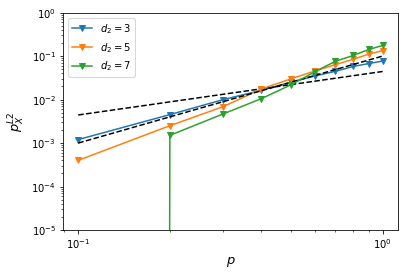

In [96]:
fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    mean = np.mean(np.log10(b)-(i+1)*np.log10(a))
    ax.plot(a, b,marker='v',label=r"$d_{2}=$"+str(code_distance_list[i]))
    ax.plot(a, 10**mean*a**(i+1),marker='',color='k',linestyle="dashed")
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_X^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.00001, 1)
ax.legend()
plt.show()